In [4]:
# facial databases: http://www.face-rec.org/databases/
# data from: http://www.kasrl.org/jaffe.html
# https://github.com/ashishpatel26/Facial-Expression-Recognization-using-JAFFE
# KNN: https://github.com/nicolascerna/emotion-recognition-example

"""
p.s. the exception is that you may use/publish the representative images on the following page:

http://www.kasrl.org/jaffe.html

okay to use

KA.AN2.40
KA.FE1.45
KA.SU237
KA.HA2.30
KA.SA2.34
"""

'\np.s. the exception is that you may use/publish the representative images on the following page:\n\nhttp://www.kasrl.org/jaffe.html\n\nokay to use\n\nKA.AN2.40\nKA.FE1.45\nKA.SU237\nKA.HA2.30\nKA.SA2.34\n'

![copyright image](http://www.kasrl.org/KA.jpg)
KA.AN2.40

![copyright image](http://www.kasrl.org/KA_004.jpg)
KA.SU237

![copyright image](http://www.kasrl.org/KA_003.jpg)
KA.HA2.30

![copyright image](http://www.kasrl.org/KA_005.jpg)
KA.SA2.34

![copyright image](http://www.kasrl.org/KA_002.jpg)
KA.FE1.45

In [5]:
# TODO: data 정제, Label 정리

In [4]:
import os
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
root = './jaffe/'
label = 'jaffe_labels.txt'

label_path = os.path.join(root, label)
with open(label_path, 'r') as f:
    print(f.readline())
    print(f.readline())
    for line in f:
        print(line)
        break

# HAP SAD SUR ANG DIS FEA PIC

--------------------------------------------------------------

1 2.87 2.52 2.10 1.97 1.97 2.06 KM-NE1



# Data modification

In [6]:
names = ['idx', 'Happy', 'Sad', 'Surprise', 'Angry', 'Disappointed', 'Fear', 'filename']
data = pd.read_csv(label_path, sep=" ", header=1, index_col=None, names=names)


In [7]:
from glob import glob

In [8]:
file_paths = glob("./jaffe/*.tiff")

In [111]:
def set_file_name(x):
    for file_name in file_paths:
        if '.'.join(x.split('-')) in file_name:
            return file_name
        
data['file_name']= data['filename'].map(set_file_name)

def set_file_name(df_line):
    if isinstance(df_line, pd.core.series.Series):
        file_name = df_line['filename'].replace('-', '.') + str('.') +  str(df_line.name + 1) + '.tiff'
        print(f"file_name: {file_name!r}")
        return file_name
    else:
        return df_line + '.tiff'

In [11]:
data.head()

,idx,Happy,Sad,Surprise,Angry,Disappointed,Fear,filename,file_name
0,1,2.87,2.52,2.10,1.97,1.97,2.06,KM-NE1,./jaffe/KM.NE1.1.tiff
1,2,2.87,2.42,1.58,1.84,1.77,1.77,KM-NE2,./jaffe/KM.NE2.2.tiff
2,3,2.50,2.10,1.70,1.50,1.73,1.53,KM-NE3,./jaffe/KM.NE3.3.tiff
3,4,4.90,1.13,1.26,1.10,1.03,1.10,KM-HA1,./jaffe/KM.HA1.4.tiff
4,5,4.87,1.20,1.43,1.03,1.07,1.07,KM-HA2,./jaffe/KM.HA2.5.tiff


In [12]:
#NE가 들어간 경우 Neutral 이므로 새로운 column을 추가하고 점수를 5.0으로 매김(임의로) 

In [13]:
# column, name, value
try:
    data['Neutral']
except KeyError:
    data.insert(1, 'Neutral', 0.)

In [14]:
data.head()

,idx,Neutral,Happy,Sad,Surprise,Angry,Disappointed,Fear,filename,file_name
0,1,0.0,2.87,2.52,2.10,1.97,1.97,2.06,KM-NE1,./jaffe/KM.NE1.1.tiff
1,2,0.0,2.87,2.42,1.58,1.84,1.77,1.77,KM-NE2,./jaffe/KM.NE2.2.tiff
2,3,0.0,2.50,2.10,1.70,1.50,1.73,1.53,KM-NE3,./jaffe/KM.NE3.3.tiff
3,4,0.0,4.90,1.13,1.26,1.10,1.03,1.10,KM-HA1,./jaffe/KM.HA1.4.tiff
4,5,0.0,4.87,1.20,1.43,1.03,1.07,1.07,KM-HA2,./jaffe/KM.HA2.5.tiff


In [15]:
data.loc[data['filename'].str.contains('NE'), 'Neutral'] = 5.0

In [16]:
data.loc[~data['filename'].str.contains('NE'), 'Neutral'] = 1.0

In [17]:
data.head()

,idx,Neutral,Happy,Sad,Surprise,Angry,Disappointed,Fear,filename,file_name
0,1,5.0,2.87,2.52,2.10,1.97,1.97,2.06,KM-NE1,./jaffe/KM.NE1.1.tiff
1,2,5.0,2.87,2.42,1.58,1.84,1.77,1.77,KM-NE2,./jaffe/KM.NE2.2.tiff
2,3,5.0,2.50,2.10,1.70,1.50,1.73,1.53,KM-NE3,./jaffe/KM.NE3.3.tiff
3,4,1.0,4.90,1.13,1.26,1.10,1.03,1.10,KM-HA1,./jaffe/KM.HA1.4.tiff
4,5,1.0,4.87,1.20,1.43,1.03,1.07,1.07,KM-HA2,./jaffe/KM.HA2.5.tiff


In [18]:
# show columns
data.columns

Index(['idx', 'Neutral', 'Happy', 'Sad', 'Surprise', 'Angry', 'Disappointed',
       'Fear', 'filename', 'file_name'],
      dtype='object')

In [19]:
# relocate columns
_idx = ['idx', 'Neutral', 'Happy', 'Sad', 'Surprise', 'Angry', 'Disappointed', 'Fear', 'filename', 'file_name']
data = data[_idx]
data.head()

,idx,Neutral,Happy,Sad,Surprise,Angry,Disappointed,Fear,filename,file_name
0,1,5.0,2.87,2.52,2.10,1.97,1.97,2.06,KM-NE1,./jaffe/KM.NE1.1.tiff
1,2,5.0,2.87,2.42,1.58,1.84,1.77,1.77,KM-NE2,./jaffe/KM.NE2.2.tiff
2,3,5.0,2.50,2.10,1.70,1.50,1.73,1.53,KM-NE3,./jaffe/KM.NE3.3.tiff
3,4,1.0,4.90,1.13,1.26,1.10,1.03,1.10,KM-HA1,./jaffe/KM.HA1.4.tiff
4,5,1.0,4.87,1.20,1.43,1.03,1.07,1.07,KM-HA2,./jaffe/KM.HA2.5.tiff


In [20]:
data.iloc[0][1:8]

Neutral            5
Happy           2.87
Sad             2.52
Surprise         2.1
Angry           1.97
Disappointed    1.97
Fear            2.06
Name: 0, dtype: object

In [21]:
data.iloc[0][['Neutral', 'Happy', 'Sad', 'Surprise', 'Angry', 'Disappointed', 'Fear']]

Neutral            5
Happy           2.87
Sad             2.52
Surprise         2.1
Angry           1.97
Disappointed    1.97
Fear            2.06
Name: 0, dtype: object

# Set label Mask

In [22]:
label = {'Neutral': 0, 
         'Happy': 1, 
         'Sad': 2, 
         'Surprise': 3, 
         'Angry': 4, 
         'Disappointed': 5, 
         'Fear': 6
        }
f_label = {'NE': 0,
           'HA': 1,
           'SA': 2,
           'SU': 3,
           'AN': 4,
           'DI': 5,
           'FE': 6
          }
try:
    data['label']
except KeyError:
    data.insert(10, 'label', np.nan)

In [23]:
data.head()

,idx,Neutral,Happy,Sad,Surprise,Angry,Disappointed,Fear,filename,file_name,label
0,1,5.0,2.87,2.52,2.10,1.97,1.97,2.06,KM-NE1,./jaffe/KM.NE1.1.tiff,NaN
1,2,5.0,2.87,2.42,1.58,1.84,1.77,1.77,KM-NE2,./jaffe/KM.NE2.2.tiff,NaN
2,3,5.0,2.50,2.10,1.70,1.50,1.73,1.53,KM-NE3,./jaffe/KM.NE3.3.tiff,NaN
3,4,1.0,4.90,1.13,1.26,1.10,1.03,1.10,KM-HA1,./jaffe/KM.HA1.4.tiff,NaN
4,5,1.0,4.87,1.20,1.43,1.03,1.07,1.07,KM-HA2,./jaffe/KM.HA2.5.tiff,NaN


In [27]:
for idx, item in data.iterrows():
    max_label = item[item == item[1:8].max()].index[0]
    max_value = label.get(max_label)
    orig_label = item[-3][-3:-1]
    orig_value = f_label.get(orig_label)
    
    if max_value == orig_value:
        data.at[idx, 'label'] = max_value
    else:
        data.at[idx, 'label'] = orig_value
        print(idx)

19
21
37
42
43
44
63
65
66
83
84
85
86
99
101
105
106
120
121
126
146
147
148
163
168
169
170
189
190
191
200
201
209
210


In [28]:
data.tail()

,idx,Neutral,Happy,Sad,Surprise,Angry,Disappointed,Fear,filename,file_name,label
208,215,1.0,1.45,3.19,1.81,3.16,4.19,2.77,NA-DI2,./jaffe/NA.DI2.215.tiff,5.0
209,216,1.0,1.43,2.87,1.77,4.33,3.87,2.10,NA-DI3,./jaffe/NA.DI3.216.tiff,5.0
210,217,1.0,1.61,2.68,4.10,3.16,3.81,3.90,NA-FE1,./jaffe/NA.FE1.217.tiff,6.0
211,218,1.0,1.68,3.10,3.74,3.19,3.58,3.87,NA-FE2,./jaffe/NA.FE2.218.tiff,6.0
212,219,1.0,1.48,3.26,3.39,2.71,3.06,3.74,NA-FE3,./jaffe/NA.FE3.219.tiff,6.0


# Separate X, y and train, test data

In [30]:
from sklearn.model_selection import train_test_split

# id 제외
X = data.loc[:, 'Neutral':'file_name']
y = data.loc[:, 'label']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [31]:
x_train.head()

,Neutral,Happy,Sad,Surprise,Angry,Disappointed,Fear,filename,file_name
63,1.0,1.23,4.26,3.16,2.13,3.26,4.03,YM-FE1,./jaffe/YM.FE1.67.tiff
120,1.0,1.26,3.32,1.52,4.13,4.52,2.74,MK-AN2,./jaffe/MK.AN2.126.tiff
152,1.0,4.42,1.55,1.42,1.42,1.45,1.45,KL-HA1,./jaffe/KL.HA1.158.tiff
197,1.0,4.48,1.42,1.48,1.32,1.55,1.35,NA-HA3,./jaffe/NA.HA3.204.tiff
46,5.0,2.73,2.67,1.87,1.97,2.00,2.00,YM-NE2,./jaffe/YM.NE2.50.tiff


In [32]:
y_train.head()

63     6.0
120    4.0
152    1.0
197    1.0
46     0.0
Name: label, dtype: float64

In [33]:
print(len(y_train), len(y_test))

170 43


In [34]:
import cv2

In [35]:
def set_file_name(df_line):
    if isinstance(df_line, pd.core.series.Series):
        file_name = df_line['filename'].replace('-', '.') + str('.') +  str(df_line.name + 1) + '.tiff'
        print(f"file_name: {file_name!r}")
        return file_name
    else:
        return df_line + '.tiff'

In [36]:
import matplotlib

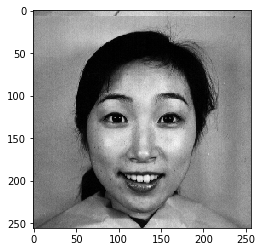

In [37]:
# show test image
imageFileName = set_file_name('KA.HA2.30')
imageToUse = cv2.imread(os.path.join(root, imageFileName))

plt.imshow(np.reshape(imageToUse, [256, 256, 3]), interpolation='nearest')

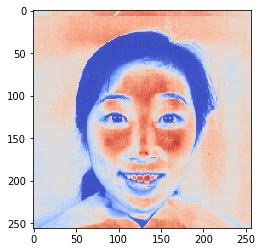

In [38]:
# from PIL import Image
# change colormapped

# Get the color map by name:
im_gray = cv2.imread(os.path.join(root, imageFileName), cv2.IMREAD_GRAYSCALE)
cm = plt.cm.coolwarm

# Apply the colormap like a function to any array:
colored_image = cm(im_gray)

# Obtain a 4-channel image (R,G,B,A) in float [0, 1]
# But we want to convert to RGB in uint8 and save it:
m = (colored_image[:, :, :3] * 255).astype(np.uint8)
plt.imshow(m)

In [37]:
# # show test image
# idx = 4
# imageFileName = set_file_name(x_test.iloc[idx])
# imageToUse = cv2.imread(os.path.join(root, imageFileName))
# plt.imshow(np.reshape(imageToUse, [256, 256, 3]), interpolation='nearest', cmap='gray')

In [38]:
# imageToUse.shape

In [39]:
# def set_file_name(df_line):
#     if isinstance(df_line, pd.core.series.Series):
#         return df_line['filename'].replace('-', '.') + str('.') +  str(df_line.name + 1) + '.tiff'
#     else:
#         return df_line + '.tiff'

In [39]:
# load train_data
train_data = []
im_size = 128

for idx, item in x_train.iterrows():
    #     imageFileName = set_file_name(item)
    imageFileName = os.path.split(item['file_name'])[-1]
    print(imageFileName)
    # color
    #     imageToUse = cv2.imread(os.path.join(root, imageFileName))
    # gray
    imageToUse = cv2.imread(os.path.join(root, imageFileName), cv2.IMREAD_GRAYSCALE)
    
    newimg = cv2.resize(imageToUse, (im_size, im_size))
    train_data.append(newimg)

YM.FE1.67.tiff
MK.AN2.126.tiff
KL.HA1.158.tiff
NA.HA3.204.tiff
YM.NE2.50.tiff
YM.AN3.63.tiff
NM.SU1.101.tiff
MK.DI3.130.tiff
KA.HA4.32.tiff
NA.AN2.212.tiff
KR.SA1.77.tiff
KL.HA2.159.tiff
KL.DI2.171.tiff
UY.NE2.135.tiff
KL.DI3.172.tiff
KR.FE2.90.tiff
YM.FE2.68.tiff
MK.AN3.127.tiff
KM.FE3.25.tiff
TM.DI3.195.tiff
NM.SU3.103.tiff
NA.HA1.202.tiff
KA.DI2.43.tiff
TM.HA3.182.tiff
UY.DI1.149.tiff
KR.NE1.71.tiff
MK.FE2.132.tiff
MK.NE1.113.tiff
UY.SU3.145.tiff
KM.SU2.15.tiff
YM.SA1.55.tiff
NM.DI3.109.tiff
YM.SU2.59.tiff
KL.AN3.169.tiff
KL.FE1.174.tiff
KR.AN3.85.tiff
TM.DI2.194.tiff
YM.NE1.49.tiff
NA.DI3.216.tiff
MK.SU1.122.tiff
UY.HA2.138.tiff
KA.SA1.33.tiff
MK.HA2.117.tiff
KL.SA1.161.tiff
KA.AN1.39.tiff
UY.AN1.146.tiff
MK.HA3.118.tiff
NM.FE3.112.tiff
TM.HA2.181.tiff
KR.NE2.72.tiff
KA.AN3.41.tiff
KR.FE3.91.tiff
NA.NE1.199.tiff
KM.NE1.1.tiff
MK.SU2.123.tiff
KM.SU1.14.tiff
TM.SA2.185.tiff
YM.HA2.53.tiff
NM.NE2.93.tiff
KA.SA2.34.tiff
YM.FE3.69.tiff
NA.FE2.218.tiff
YM.FE4.70.tiff
UY.NE1.134.tiff
KA.F

In [40]:
print(len(train_data))

170


In [41]:
type(train_data)

list

In [42]:
type(train_data[0][0][0])

numpy.uint8

In [43]:
# 핵심 로직: 데이터 타입을 uint8에서 float32로 변화시켜 정밀한 학습을 만든다
# print out image datatype
print(type(train_data[0][0][0]))

# change datatype uint8 to float32
train_data = np.array(train_data)
train_data = train_data.astype('float32')
train_data = train_data/255

# show image pixel datatype
print(train_data.shape)
print(type(train_data[0][0][0]))

<class 'numpy.uint8'>
(170, 128, 128)
<class 'numpy.float32'>


In [44]:
type(train_data[0][0][0])

numpy.float32

In [45]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(np.reshape(list(y_train), (-1, 1)))

/Users/amore/opt/anaconda3/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [46]:
x_train.iloc[0]

Neutral                              1
Happy                             1.23
Sad                               4.26
Surprise                          3.16
Angry                             2.13
Disappointed                      3.26
Fear                              4.03
filename                        YM-FE1
file_name       ./jaffe/YM.FE1.67.tiff
Name: 63, dtype: object

In [47]:
y_train_hot = enc.transform(np.reshape(list(y_train), (-1, 1))).toarray()

In [48]:
y_train_hot.argmax(1)

array([6, 4, 1, 1, 0, 4, 3, 5, 1, 4, 2, 1, 5, 0, 5, 6, 6, 4, 6, 5, 3, 1,
       5, 1, 5, 0, 6, 0, 3, 3, 2, 5, 3, 4, 6, 4, 5, 0, 5, 3, 1, 2, 1, 2,
       4, 4, 1, 6, 1, 0, 4, 6, 0, 0, 3, 3, 2, 1, 0, 2, 6, 6, 6, 0, 6, 2,
       1, 2, 0, 4, 0, 0, 4, 2, 6, 2, 0, 1, 6, 1, 4, 6, 3, 2, 4, 1, 3, 0,
       2, 3, 2, 5, 4, 1, 6, 2, 4, 6, 5, 5, 5, 0, 3, 5, 2, 3, 2, 6, 5, 0,
       6, 2, 0, 1, 1, 4, 4, 1, 5, 2, 2, 6, 3, 2, 6, 0, 4, 3, 2, 3, 3, 4,
       3, 2, 6, 5, 1, 5, 5, 0, 2, 3, 1, 4, 5, 5, 1, 1, 5, 4, 3, 1, 2, 4,
       6, 5, 6, 4, 1, 5, 3, 4, 1, 0, 3, 6, 3, 2, 4, 4])

In [49]:
print(y_train_hot[0], len(y_train_hot[0]))

[0. 0. 0. 0. 0. 0. 1.] 7


# Train CNN

In [154]:
import tensorflow as tf
import tensorflow.contrib.slim as slim

In [155]:
128*128 / 6

2730.6666666666665

In [156]:
# set models
tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, im_size, im_size],name="x-in")
true_y = tf.placeholder(tf.float32, [None, 7],name="y-in")

x_image = tf.reshape(x, [-1, im_size, im_size, 1])

# hidden 1
hidden_1 = slim.conv2d(x_image, 6, [5, 5])
pool_1 = slim.max_pool2d(hidden_1, [2, 2])

# hidden 2
hidden_2 = slim.fully_connected(slim.flatten(pool_1), 294, activation_fn=tf.nn.relu)
out_y = slim.fully_connected(slim.flatten(hidden_2), 7, activation_fn=tf.nn.softmax)

cross_entropy = -tf.reduce_sum(true_y * tf.log(out_y))
correct_prediction = tf.equal(tf.argmax(out_y, 1), tf.argmax(true_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [157]:
from IPython.display import clear_output, display
from time import sleep

In [158]:
# learning
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

jmp = 20
n_epoch = 50
for epoch in range(n_epoch):
    for i in range(0, 180, jmp):
        sess.run(train_step, feed_dict={x: train_data[i:i+jmp], 
                                        true_y: y_train_hot[i:i+jmp]})
        if i % jmp == 0 and i != 0:
            clear_output(wait=True)
            trainAccuracy = sess.run(accuracy, 
                                     feed_dict={x: train_data[i:i+jmp], 
                                                true_y: y_train_hot[i:i+jmp]})
            print("[epoch: {}] step {}, training accuracy {:.2%}".format(epoch, i, trainAccuracy))
            sleep(0.005)

[epoch: 49] step 160, training accuracy 100.00%


In [159]:
# load train_data
test_data = []

for idx, item in x_test.iterrows():
    #     imageFileName = set_file_name(item)
    imageFileName = os.path.split(item['file_name'])[-1]
    # color
    #     imageToUse = cv2.imread(os.path.join(root, imageFileName))
    # gray
    imageToUse = cv2.imread(os.path.join(root, imageFileName), cv2.IMREAD_GRAYSCALE)
    newimg = cv2.resize(imageToUse, (im_size, im_size))
    test_data.append(newimg)

In [160]:
np.asarray(test_data).shape

(43, 128, 128)

In [161]:
# set y_test hot encoding
y_test_hot = enc.transform(np.reshape(list(y_test), (-1, 1))).toarray()

In [162]:
len(test_data)

43

In [163]:
print('Accuracy: {:.2%}'.format(sess.run(accuracy, 
                                         feed_dict={x: test_data, 
                                                    true_y: y_test_hot})))

Accuracy: 83.72%


# Predict One

0.00%		Neutral
100.00%		Happy
0.00%		Sad
0.00%		Surprise
0.00%		Angry
0.00%		Disappointed
0.00%		Fear


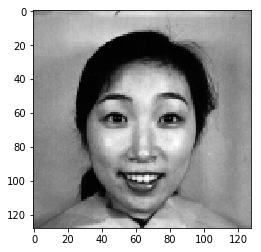

In [164]:
# KA.AN2.40
# KA.FE1.45
# KA.SU237
# KA.HA2.30
# KA.SA2.34

imageFileName = set_file_name('KA.HA2.30')
im_gray = cv2.imread(os.path.join(root, imageFileName), cv2.IMREAD_GRAYSCALE)
newimg = cv2.resize(im_gray, (im_size, im_size))
plt.imshow(newimg, interpolation='nearest', cmap='gray')

emotion_label = {
    0: 'Neutral',
    1: 'Happy',
    2: 'Sad',
    3: 'Surprise',
    4: 'Angry',
    5: 'Disappointed',
    6: 'Fear'
}

# set predict, 
predict = sess.run(out_y, feed_dict={x: np.reshape(newimg, (-1, im_size, im_size))})[0]

idx = 0
for i in predict:
    print('{:.2%}\t\t{}'.format(i, emotion_label[idx]))
    idx += 1

# Decompose Variables

In [165]:
tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)

[<tf.Variable 'Conv/weights:0' shape=(5, 5, 1, 6) dtype=float32_ref>,
 <tf.Variable 'Conv/biases:0' shape=(6,) dtype=float32_ref>,
 <tf.Variable 'fully_connected/weights:0' shape=(24576, 294) dtype=float32_ref>,
 <tf.Variable 'fully_connected/biases:0' shape=(294,) dtype=float32_ref>,
 <tf.Variable 'fully_connected_1/weights:0' shape=(294, 7) dtype=float32_ref>,
 <tf.Variable 'fully_connected_1/biases:0' shape=(7,) dtype=float32_ref>]

In [166]:
layers = [hidden_1, pool_1, hidden_2]
weights = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='.*weights.*')
biases = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='.*biases.*')

In [167]:
layers

[<tf.Tensor 'Conv/Relu:0' shape=(?, 128, 128, 6) dtype=float32>,
 <tf.Tensor 'MaxPool2D/MaxPool:0' shape=(?, 64, 64, 6) dtype=float32>,
 <tf.Tensor 'fully_connected/Relu:0' shape=(?, 294) dtype=float32>]

In [168]:
weights

[<tf.Variable 'Conv/weights:0' shape=(5, 5, 1, 6) dtype=float32_ref>,
 <tf.Variable 'fully_connected/weights:0' shape=(24576, 294) dtype=float32_ref>,
 <tf.Variable 'fully_connected_1/weights:0' shape=(294, 7) dtype=float32_ref>]

In [169]:
biases

[<tf.Variable 'Conv/biases:0' shape=(6,) dtype=float32_ref>,
 <tf.Variable 'fully_connected/biases:0' shape=(294,) dtype=float32_ref>,
 <tf.Variable 'fully_connected_1/biases:0' shape=(7,) dtype=float32_ref>]

In [170]:
def getActivations(layer, image):
    units = sess.run(layer, feed_dict={x: np.reshape(image, (-1, im_size, im_size))})    
    return units

In [171]:
activations = []
for layer in layers:
    activations.append(getActivations(layer, newimg))

# Show LRP

In [172]:
from tensorflow.python.ops import gen_nn_ops

def backprop_dense(activation, weight, bias, relevance):
    w = tf.maximum(0., weight)
    b = tf.maximum(0., bias)
    z = tf.matmul(activation, w) + b
    
    s = relevance / z
    c = tf.matmul(s, tf.transpose(w))
    return activation * c

def backprop_pooling(activation, relevance):
    # kernel size, strides
    # if z is zero
    ksize = strides = [1, 2, 2, 1]
    z = tf.nn.max_pool(activation, ksize, strides, padding='SAME') + 1e-10
    s = relevance / z
    c = gen_nn_ops.max_pool_grad(activation, z, s, ksize, strides, padding='SAME')
    # input, argmax, argmax_mask
    return activation * c

def backprop_conv(activation, weight, bias, relevance):
    strides = [1, 1, 1, 1]
    w = tf.maximum(0., weight)
    b = tf.maximum(0., bias)
    z = tf.nn.conv2d(activation, w, strides, padding='SAME')
    z = tf.nn.bias_add(z, b)

    s = relevance / z
    c = tf.nn.conv2d_backprop_input(tf.shape(activation), w, s, strides, padding='SAME')
    return activation * c

In [173]:
predict

array([0., 1., 0., 0., 0., 0., 0.], dtype=float32)

# Get $f_x$

In [174]:
f_x = max(predict)
print(f_x)

1.0


# Get $R3 \leftarrow f_x$

In [175]:
predict[predict < 0] = 0
R3 = predict
R3.shape

(7,)

# Get $R2 \leftarrow R3 \leftarrow f_x$

In [176]:
len(activations), len(weights), len(biases)

(3, 3, 3)

In [177]:
_idx = -1
a = activations[_idx]
w = weights[_idx]
b = biases[_idx]

print(a.shape)
print(w.shape)

R2 = backprop_dense(a.reshape(1, 294), w, b, R3)

print(R2.shape)

(1, 294)
(294, 7)
(1, 294)


# Get $R1 \leftarrow R2 \leftarrow R3 \leftarrow f_x$

In [178]:
_idx = -2

a = activations[_idx]
w = weights[_idx]
b = biases[_idx]

print(a.shape)
print(w.shape)

# 24576 = 64 * 64 * 6
R1 = backprop_dense(a.reshape(1, 24576), w, b, R2)

print(R1.shape)

(1, 64, 64, 6)
(24576, 294)
(1, 24576)


# Get $R0 \leftarrow R1 \leftarrow R2 \leftarrow R3 \leftarrow f_x$

In [179]:
_idx = -3
print(activations[_idx].shape)
print(weights[_idx].shape)
print(biases[_idx].shape)
# max pool
a = activations[_idx]
R_p = backprop_pooling(a, tf.reshape(R1, (1, 64, 64, 6)))

# convolution
w = weights[_idx]
b = biases[_idx]
img_activations = getActivations(x_image, newimg)
R0 = backprop_conv(img_activations, w, b, R_p)
print(R0.shape)

# LRP out
LRP_out = sess.run(R0)
print(LRP_out.shape)

(1, 128, 128, 6)
(5, 5, 1, 6)
(6,)
(1, 128, 128, 1)
(1, 128, 128, 1)


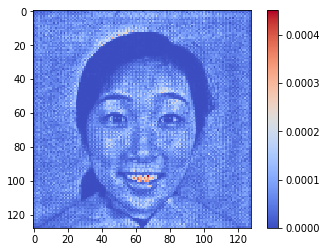

In [83]:
plt.imshow(LRP_out.reshape(128, 128), interpolation="nearest", cmap=plt.cm.coolwarm)
plt.colorbar(orientation='vertical')

# functionaize

In [84]:
def getLRP(img):
    predict = sess.run(out_y, feed_dict={x: np.reshape(img, (-1, im_size, im_size))})[0]
    
    layers = [hidden_1, pool_1, hidden_2]
    weights = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='.*weights.*')
    biases = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='.*biases.*')
    
    # get activations
    activations = []
    for layer in layers:
        activations.append(getActivations(layer, img))
        
    # get f_x
    f_x = max(predict)
    
    # R3
    predict[predict < 0] = 0
    R3 = predict
    
    #R2
    a = activations.pop()
    w = weights.pop()
    b = biases.pop()
    R2 = backprop_dense(a.reshape(1, 294), w, b, R3)
    
    # R1
    a = activations.pop()
    w = weights.pop()
    b = biases.pop()

    # 24576 = 64 * 64 * 6
    R1 = backprop_dense(a.reshape(1, 24576), w, b, R2)
    
    # R0
    # max pool
    a = activations.pop()
    R_p = backprop_pooling(a, tf.reshape(R1, (1, 64, 64, 6)))

    # convolution
    w = weights.pop()
    b = biases.pop()
    img_activations = getActivations(x_image, newimg)
    R0 = backprop_conv(img_activations, w, b, R_p)
    
    # LRP_out
    LRP_out = sess.run(R0)
    return LRP_out

# plot LRP

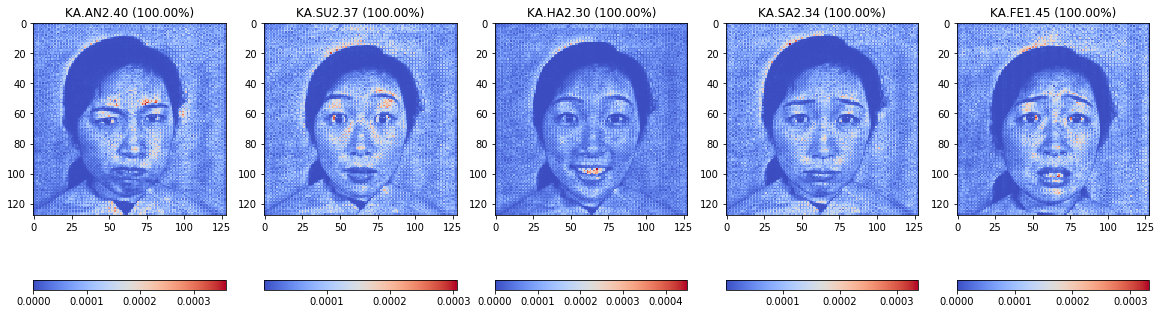

In [86]:
# KA.AN2.40
# KA.FE1.45
# KA.SU2.37
# KA.HA2.30
# KA.SA2.34
temp = ['KA.AN2.40', 'KA.SU2.37', 'KA.HA2.30', 'KA.SA2.34', 'KA.FE1.45']
# temp = ['KM.HA4.7', 'KL.HA2.159', 'KR.HA3.76', 'MK.HA3.118', 'NA.HA2.203']

plt.figure(figsize=(20, 8))

for i in range(len(temp)):
    plt.subplot(1, 5, i + 1)
    imageFileName = set_file_name(temp[i])
    
    im_gray = cv2.imread(os.path.join(root, imageFileName), cv2.IMREAD_GRAYSCALE)
    newimg = cv2.resize(im_gray, (im_size, im_size))
    predict = sess.run(out_y, feed_dict={x: np.reshape(newimg, (-1, im_size, im_size))})[0]

    plt.title('{} ({:.2%})'.format(temp[i], np.max(predict)))
    plt.imshow(getLRP(newimg).reshape(128, 128), interpolation="nearest", cmap=plt.cm.coolwarm)
    plt.colorbar(orientation='horizontal')

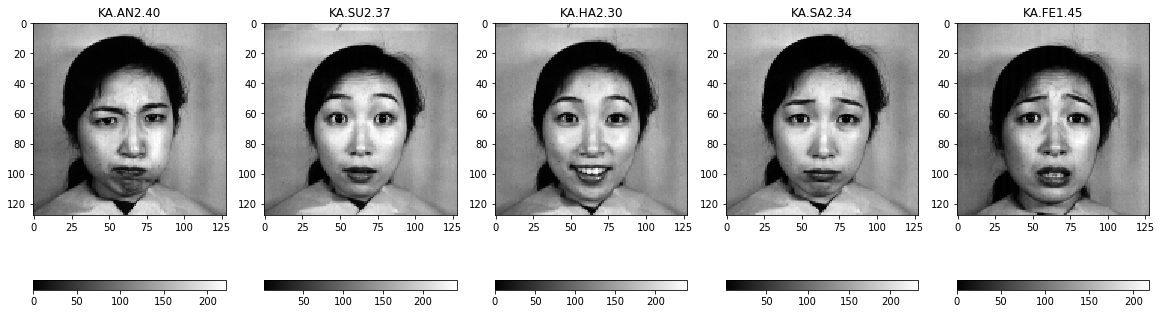

In [87]:
plt.figure(figsize=(20, 8))

for i in range(len(temp)):
    plt.subplot(1, 5, i + 1)
    plt.title(temp[i])
    imageFileName = set_file_name(temp[i])
    
    im_gray = cv2.imread(os.path.join(root, imageFileName), cv2.IMREAD_GRAYSCALE)
    newimg = cv2.resize(im_gray, (im_size, im_size))
    plt.imshow(newimg.reshape(128, 128), interpolation='nearest', cmap=plt.cm.gist_gray)
    plt.colorbar(orientation='horizontal')

# Get Normal Image

In [72]:
# https://pixabay.com/ko/photos/%EC%96%B4%EB%A6%B0%EC%9D%B4-%EC%86%8C%EB%85%80-%EC%96%BC%EA%B5%B4-%EC%88%98%EA%B1%B4-666352/
# user: Pezibear, Commercial Use allowed

(953, 1105, 3)


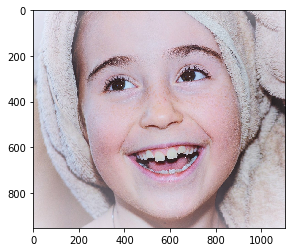

In [89]:
# show test image
_file_name = 'happy.jpg'
imageToUse = cv2.imread(os.path.join('./', _file_name), cv2.IMREAD_COLOR)
print(imageToUse.shape)
"""
OpenCV uses BGR as its default colour order for images, matplotlib uses RGB. When you display an image loaded with OpenCv in matplotlib the channels will be back to front.

The easiest way of fixing this is to use OpenCV to explicitly convert it back to RGB, much like you do when creating the greyscale image.
"""
imageToUse = cv2.cvtColor(imageToUse, cv2.COLOR_BGR2RGB)

# show original image
plt.imshow(np.reshape(imageToUse, imageToUse.shape), interpolation='nearest')

(128, 128)


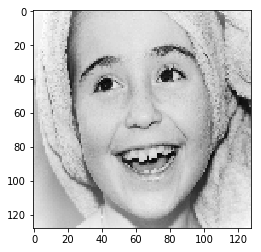

In [90]:
# convert grayscale image
im_gray = cv2.imread(os.path.join('./', _file_name), cv2.IMREAD_GRAYSCALE)
newimg = cv2.resize(im_gray, (im_size, im_size))
print(newimg.shape)
plt.imshow(np.reshape(newimg, [im_size, im_size]), interpolation='nearest', cmap=plt.cm.gist_gray)

0.00%		Neutral
100.00%		Happy
0.00%		Sad
0.00%		Surprise
0.00%		Angry
0.00%		Disappointed
0.00%		Fear


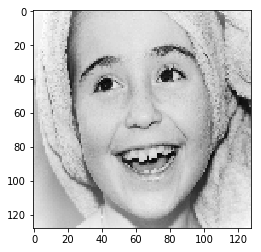

In [91]:
# predict
plt.imshow(newimg, interpolation='nearest', cmap='gray')

emotion_label = {
    0: 'Neutral',
    1: 'Happy',
    2: 'Sad',
    3: 'Surprise',
    4: 'Angry',
    5: 'Disappointed',
    6: 'Fear'
}

# set predict, 
predict = sess.run(out_y, feed_dict={x: np.reshape(newimg, (-1, im_size, im_size))})[0]

idx = 0
for i in predict:
    print('{:.2%}\t\t{}'.format(i, emotion_label[idx]))
    idx += 1

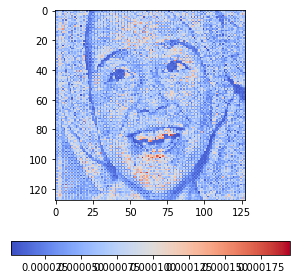

In [92]:
plt.figure(figsize=(5, 5))
plt.imshow(getLRP(newimg).reshape(128, 128), interpolation="nearest", cmap=plt.cm.coolwarm)
plt.colorbar(orientation='horizontal')

# Analysis another

In [93]:
# MarkoLovric, commercial use allowed

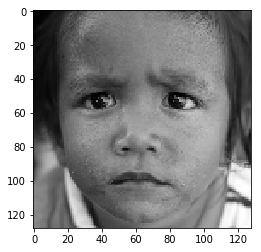

In [94]:
# convert grayscale image
_file_name = 'sad.jpg'
im_gray = cv2.imread(os.path.join('./', _file_name), cv2.IMREAD_GRAYSCALE)
newimg = cv2.resize(im_gray, (im_size, im_size))
plt.imshow(np.reshape(newimg, [im_size, im_size]), interpolation='nearest', cmap=plt.cm.gist_gray)

0.00%		Neutral
100.00%		Happy
0.00%		Sad
0.00%		Surprise
0.00%		Angry
0.00%		Disappointed
0.00%		Fear


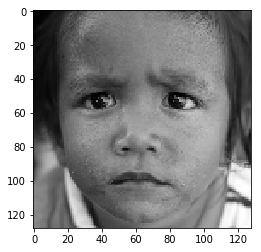

In [95]:
# predict
plt.imshow(newimg, interpolation='nearest', cmap='gray')

emotion_label = {
    0: 'Neutral',
    1: 'Happy',
    2: 'Sad',
    3: 'Surprise',
    4: 'Angry',
    5: 'Disappointed',
    6: 'Fear'
}

# set predict, 
predict = sess.run(out_y, feed_dict={x: np.reshape(newimg, (-1, im_size, im_size))})[0]

idx = 0
for i in predict:
    print('{:.2%}\t\t{}'.format(i, emotion_label[idx]))
    idx += 1

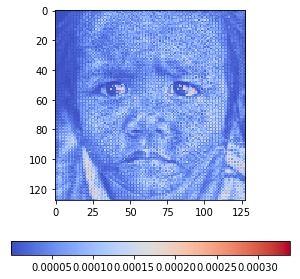

In [96]:
plt.figure(figsize=(5, 5))
plt.imshow(getLRP(newimg).reshape(128, 128), interpolation="nearest", cmap=plt.cm.coolwarm)
plt.colorbar(orientation='horizontal')

# Happy is not right Let's make another

In [97]:
sess.close()


tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, im_size, im_size],name="x-in")
true_y = tf.placeholder(tf.float32, [None, 7],name="y-in")

x_image = tf.reshape(x, [-1, im_size, im_size, 1])

# layer 1
hidden_1 = slim.conv2d(x_image, 6, [5, 5])
pool_1 = slim.max_pool2d(hidden_1, [2, 2])

# layer 2
hidden_2 = slim.conv2d(pool_1, 16, [5, 5])
pool_2 = slim.max_pool2d(hidden_2, [2, 2])

# layer 3
hidden_3 = slim.conv2d(pool_2, 120, [5, 5])

hidden_4 = slim.fully_connected(slim.flatten(hidden_3), 42, activation_fn=tf.nn.relu)
out_y = slim.fully_connected(slim.flatten(hidden_4), 7, activation_fn=tf.nn.softmax)

cross_entropy = -tf.reduce_sum(true_y * tf.log(out_y))
correct_prediction = tf.equal(tf.argmax(out_y, 1), tf.argmax(true_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [98]:
# learning
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

jmp = 20
n_epoch = 100
for epoch in range(n_epoch):
    for i in range(0, 180, jmp):
        sess.run(train_step, feed_dict={x: train_data[i:i+jmp], 
                                        true_y: y_train_hot[i:i+jmp]})
        if i % jmp == 0 and i != 0:
            clear_output(wait=True)
            trainAccuracy = sess.run(accuracy, 
                                     feed_dict={x: train_data[i:i+jmp], 
                                                true_y: y_train_hot[i:i+jmp]})
            print("[epoch: {}] step {}, training accuracy {:.2%}".format(epoch, i, trainAccuracy))
            sleep(0.005)

[epoch: 99] step 160, training accuracy 100.00%


In [108]:
x_test, y_test, y_test_hot

(     Neutral  Happy   Sad  Surprise  Angry  Disappointed  Fear filename  \
 13       1.0   2.16  1.84      4.94   1.71          1.65  2.32   KM-SU3   
 77       1.0   2.42  1.84      4.74   1.94          1.87  2.06   KR-SU3   
 34       1.0   2.94  1.97      4.74   1.68          1.71  2.03   KA-SU3   
 134      1.0   1.35  3.65      1.58   3.00          3.55  2.32   UY-SA1   
 208      1.0   1.45  3.19      1.81   3.16          4.19  2.77   NA-DI2   
 149      5.0   1.84  2.29      3.71   2.35          2.32  2.13   KL-NE1   
 102      1.0   2.67  2.67      1.77   2.30          3.10  2.21   NM-DI1   
 73       1.0   1.42  4.26      1.74   2.52          3.06  2.48   KR-SA2   
 92       1.0   4.19  1.45      1.84   1.42          1.35  1.39   NM-HA3   
 53       1.0   1.55  4.32      1.35   1.71          2.74  2.55   YM-SA3   
 109      5.0   2.97  2.39      1.71   1.81          1.61  1.84   MK-NE3   
 97       1.0   2.90  1.53      4.80   1.43          1.37  1.57   NM-SU2   
 104      1.

In [110]:
!ls -al ./jaffe/KM.SU3.16.tiff

-rw-rw-rw-@ 1 amore  staff  67368  7 20  2004 ./jaffe/KM.SU3.16.tiff


In [113]:
# def set_file_name(x):
#     for file_name in file_paths:
#         if '.'.join(x.split('-')) in file_name:
#             return file_name
        
# data['file_name']= data['filename'].map(set_file_name)

def set_file_name(df_line):
    if isinstance(df_line, pd.core.series.Series):
        file_name = df_line['file_name']
        print(f"file_name: {file_name!r}")
        return file_name
    else:
        return df_line + '.tiff'

In [117]:
# load train_data
test_data = []

for idx, item in x_test.iterrows():
    imageFileName = set_file_name(item)
    # color
    #     imageToUse = cv2.imread(os.path.join(root, imageFileName))
    # gray
    print(imageFileName)
    imageToUse = cv2.imread(imageFileName, cv2.IMREAD_GRAYSCALE)
    newimg = cv2.resize(imageToUse, (im_size, im_size))
    test_data.append(newimg)

file_name: './jaffe/KM.SU3.16.tiff'
./jaffe/KM.SU3.16.tiff
file_name: './jaffe/KR.SU3.82.tiff'
./jaffe/KR.SU3.82.tiff
file_name: './jaffe/KA.SU3.38.tiff'
./jaffe/KA.SU3.38.tiff
file_name: './jaffe/UY.SA1.140.tiff'
./jaffe/UY.SA1.140.tiff
file_name: './jaffe/NA.DI2.215.tiff'
./jaffe/NA.DI2.215.tiff
file_name: './jaffe/KL.NE1.155.tiff'
./jaffe/KL.NE1.155.tiff
file_name: './jaffe/NM.DI1.107.tiff'
./jaffe/NM.DI1.107.tiff
file_name: './jaffe/KR.SA2.78.tiff'
./jaffe/KR.SA2.78.tiff
file_name: './jaffe/NM.HA3.97.tiff'
./jaffe/NM.HA3.97.tiff
file_name: './jaffe/YM.SA3.57.tiff'
./jaffe/YM.SA3.57.tiff
file_name: './jaffe/MK.NE3.115.tiff'
./jaffe/MK.NE3.115.tiff
file_name: './jaffe/NM.SU2.102.tiff'
./jaffe/NM.SU2.102.tiff
file_name: './jaffe/NM.FE1.110.tiff'
./jaffe/NM.FE1.110.tiff
file_name: './jaffe/KL.HA3.160.tiff'
./jaffe/KL.HA3.160.tiff
file_name: './jaffe/UY.NE3.136.tiff'
./jaffe/UY.NE3.136.tiff
file_name: './jaffe/KL.SU3.166.tiff'
./jaffe/KL.SU3.166.tiff
file_name: './jaffe/NM.AN2.105.tiff'

In [118]:
np.asarray(test_data).shape

(43, 128, 128)

In [119]:
# set y_test hot encoding
y_test_hot = enc.transform(np.reshape(list(y_test), (-1, 1))).toarray()

In [120]:
print('Accuracy: {:.2%}'.format(sess.run(accuracy, 
                                         feed_dict={x: test_data, 
                                                    true_y: y_test_hot})))

Accuracy: 86.05%


# Decompose variables

0.00%		Neutral
0.00%		Happy
0.00%		Sad
0.00%		Surprise
0.00%		Angry
100.00%		Disappointed
0.00%		Fear


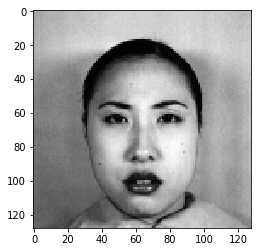

In [122]:
plt.imshow(newimg, interpolation='nearest', cmap='gray')
# set predict, 
predict = sess.run(out_y, feed_dict={x: np.reshape(newimg, (-1, im_size, im_size))})[0]

idx = 0
for i in predict:
    print('{:.2%}\t\t{}'.format(i, emotion_label[idx]))
    idx += 1

In [123]:
layers = [hidden_1, pool_1, hidden_2, pool_2, hidden_3, hidden_4]
weights = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='.*weights.*')
biases = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='.*biases.*')

In [124]:
activations = []
for layer in layers:
    activations.append(getActivations(layer, newimg))

In [125]:
# f_x
f_x = max(predict)
print(f_x)

# R5
predict[predict < 0] = 0
R5 = predict
R5.shape

1.0


(7,)

In [126]:
# R4
_idx = -1
a = activations[_idx]
w = weights[_idx]
b = biases[_idx]

print(a.shape)
print(w.shape)

R4 = backprop_dense(a.reshape(1, 42), w, b, R5)

print(R4.shape)

(1, 42)
(42, 7)
(1, 42)


In [127]:
# R3 
_idx = -2

a = activations[_idx]
w = weights[_idx]
b = biases[_idx]

print(a.shape)
print(w.shape)

# 122880 = 32 * 32 * 120
R3 = backprop_dense(a.reshape(1, 122880), w, b, R4)

print(R3.shape)

(1, 32, 32, 120)
(122880, 42)
(1, 122880)


In [128]:
# R2
_idx = -3
w = weights[_idx]
b = biases[_idx]
p = activations[_idx]

print(p.shape)
print(w.shape)

# convolution backprop
R_conv = backprop_conv(p, w, b, tf.reshape(R3, [1, 32, 32, 120]))
print(R_conv.shape)

_idx = -4
a = activations[_idx]

R2 = backprop_pooling(a, R_conv)
print(R2.shape)

(1, 32, 32, 16)
(5, 5, 16, 120)
(1, 32, 32, 16)
(1, 64, 64, 16)


In [129]:
# R1
_idx = -4
w = weights[_idx]
b = biases[_idx]
_idx = -5
p = activations[_idx]

print(p.shape)
print(w.shape)

# convolution backprop
R_conv = backprop_conv(p, w, b, tf.reshape(R2, [1, 64, 64, 16]))
print(R_conv.shape)

_idx = -6
a = activations[_idx]

R1 = backprop_pooling(a, R_conv)
print(R1.shape)

(1, 64, 64, 6)
(5, 5, 6, 16)
(1, 64, 64, 6)
(1, 128, 128, 6)


In [130]:
# img
img_activations = getActivations(x_image, newimg)

_idx = -5
w = weights[_idx]
b = biases[_idx]

R0 = backprop_conv(img_activations, w, b, R1)
print(R0.shape)
LRP_out = sess.run(R0)
print(LRP_out.shape)

(1, 128, 128, 1)
(1, 128, 128, 1)


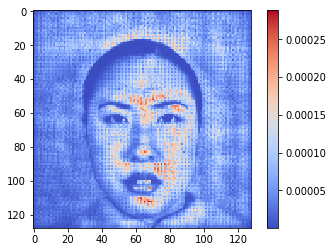

In [131]:
plt.imshow(LRP_out.reshape(128, 128), interpolation="nearest", cmap=plt.cm.coolwarm)
plt.colorbar(orientation='vertical')

0.00%		Neutral
0.00%		Happy
100.00%		Sad
0.00%		Surprise
0.00%		Angry
0.00%		Disappointed
0.00%		Fear


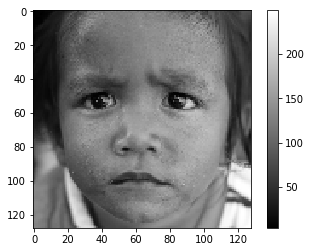

In [132]:
_file_name = 'sad.jpg'
im_gray = cv2.imread(os.path.join('./', _file_name), cv2.IMREAD_GRAYSCALE)
newimg = cv2.resize(im_gray, (im_size, im_size))
plt.imshow(newimg, interpolation="nearest", cmap=plt.cm.gist_gray)
plt.colorbar(orientation='vertical')

# set predict, 
predict = sess.run(out_y, feed_dict={x: np.reshape(newimg, (-1, im_size, im_size))})[0]

idx = 0
for i in predict:
    print('{:.2%}\t\t{}'.format(i, emotion_label[idx]))
    idx += 1
# correct. beause of the Translation invarient

In [133]:
def getLRP(img):
    predict = sess.run(out_y, feed_dict={x: np.reshape(img, (-1, im_size, im_size))})[0]
    
    layers = [hidden_1, pool_1, hidden_2, pool_2, hidden_3, hidden_4]
    weights = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='.*weights.*')
    biases = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='.*biases.*')
    
    # get activations
    activations = []
    for layer in layers:
        activations.append(getActivations(layer, img))
        
    # get f_x
    f_x = max(predict)
    
    # R5
    predict[predict < 0] = 0
    R5 = predict
    
    #R4, FC
    a = activations.pop()
    w = weights.pop()
    b = biases.pop()
    R4 = backprop_dense(a.reshape(1, 42), w, b, R5)
    
    # R3, FC
    a = activations.pop()
    w = weights.pop()
    b = biases.pop()
    # 122880 = 32 * 32 * 120
    R3 = backprop_dense(a.reshape(1, 122880), w, b, R4)
    
    # R2, CONV
    w = weights.pop()
    b = biases.pop()
    p = activations.pop()
    # convolution backprop
    R_conv = backprop_conv(p, w, b, tf.reshape(R3, [1, 32, 32, 120]))
    a = activations.pop()
    # R2, POOL
    R2 = backprop_pooling(a, R_conv)
    
    # R1
    w = weights.pop()
    b = biases.pop()
    p = activations.pop()
    # R1, CONV
    R_conv = backprop_conv(p, w, b, tf.reshape(R2, [1, 64, 64, 16]))
    a = activations.pop()
    # R1, POOL
    R1 = backprop_pooling(a, R_conv)
    
    # R0
    img_activations = getActivations(x_image, newimg)
    w = weights.pop()
    b = biases.pop()
    # R0, CONV
    R0 = backprop_conv(img_activations, w, b, R1)
    LRP_out = sess.run(R0)
    return LRP_out

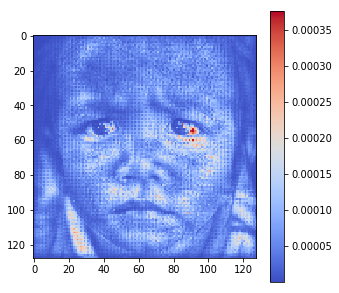

In [134]:
# plot LRP
plt.figure(figsize=(5, 5))
plt.imshow(getLRP(newimg).reshape(128, 128), interpolation="nearest", cmap=plt.cm.coolwarm)
plt.colorbar(orientation='vertical')